In [1]:
from prophet import Prophet
import xgboost as xgb

import sys, os, yaml, ta
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

import yfinance as yf
from dateutil.relativedelta import relativedelta

from stock_forecast_module import *

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

/Users/truongnguyen/miniforge3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
# Load inputs from inputs.yml
with open('inputs.yml', 'r') as file:
    inputs = yaml.safe_load(file)

# Access specific inputs
start_dt = inputs['params']['start_dt']
split_dt = inputs['params']['split_dt']
real_fc_start_dt = datetime.today().date().strftime('%Y-%m-%d') # inputs['params']['real_fc_start_dt']
real_fc_end_dt = inputs['params']['real_fc_end_dt']
stock_sticker = inputs['params']['stock_sticker']

print(f"Stock sticker: {stock_sticker}")
print(f"Start date: {start_dt}")
print(f"Split date: {split_dt}")
print(f"Real forecast start date: {real_fc_start_dt}")
print(f"Real forecast end date: {real_fc_end_dt}")

Stock sticker: TSLA
Start date: 2018-01-01
Split date: 2025-03-15
Real forecast start date: 2025-05-01
Real forecast end date: 2025-08-15


In [3]:
stock_data, stocks_indicator_features = import_stock_data(stock_sticker, start_dt)
display(stock_data.head())
display(stock_data.tail())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,Date,Close_TSLA,High_TSLA,Low_TSLA,Open_TSLA,Volume_TSLA,RSI,MACD,EMA_9_of_MACD,BB_High,BB_Low,SMA_20,MA_30
0,2018-01-02,21.368668,21.474001,20.733334,20.799999,65283000,49.683740,0.015227,0.158966,23.210638,19.928161,21.569400,21.328555
1,2018-01-03,21.150000,21.683332,21.036667,21.400000,67822500,47.306395,-0.007190,0.125734,23.166286,20.052848,21.609567,21.333444
2,2018-01-04,20.974667,21.236668,20.378668,20.858000,149194500,45.429338,-0.038659,0.092856,23.104457,20.187476,21.645967,21.346511
3,2018-01-05,21.105333,21.149332,20.799999,21.108000,68868000,47.113517,-0.052449,0.063795,23.095450,20.218616,21.657033,21.343778
4,2018-01-08,22.427334,22.468000,21.033333,21.066668,147891000,60.422129,0.042803,0.059596,23.153299,20.328568,21.740933,21.396689


,Date,Close_TSLA,High_TSLA,Low_TSLA,Open_TSLA,Volume_TSLA,RSI,MACD,EMA_9_of_MACD,BB_High,BB_Low,SMA_20,MA_30
1837,2025-04-24,259.510010,259.540009,249.199997,250.500000,94464200,50.982335,-7.402182,-9.505874,284.113565,220.979435,252.546500,252.144334
1838,2025-04-25,284.950012,286.850006,259.630005,261.690002,167560700,58.134886,-3.939662,-8.392631,286.609039,219.665963,253.137501,253.620001
1839,2025-04-28,285.880005,294.859985,272.420013,288.980011,151731800,58.374009,-1.107777,-6.935661,290.421499,218.086504,254.254002,254.816668
1840,2025-04-29,292.029999,293.320007,279.470001,285.500000,108906600,60.001041,1.614158,-5.225697,295.619975,216.175027,255.897501,256.617335
1841,2025-04-30,282.160004,284.450012,270.779999,279.899994,128961100,56.204160,2.940983,-3.592361,297.599311,215.565693,256.582502,258.512335


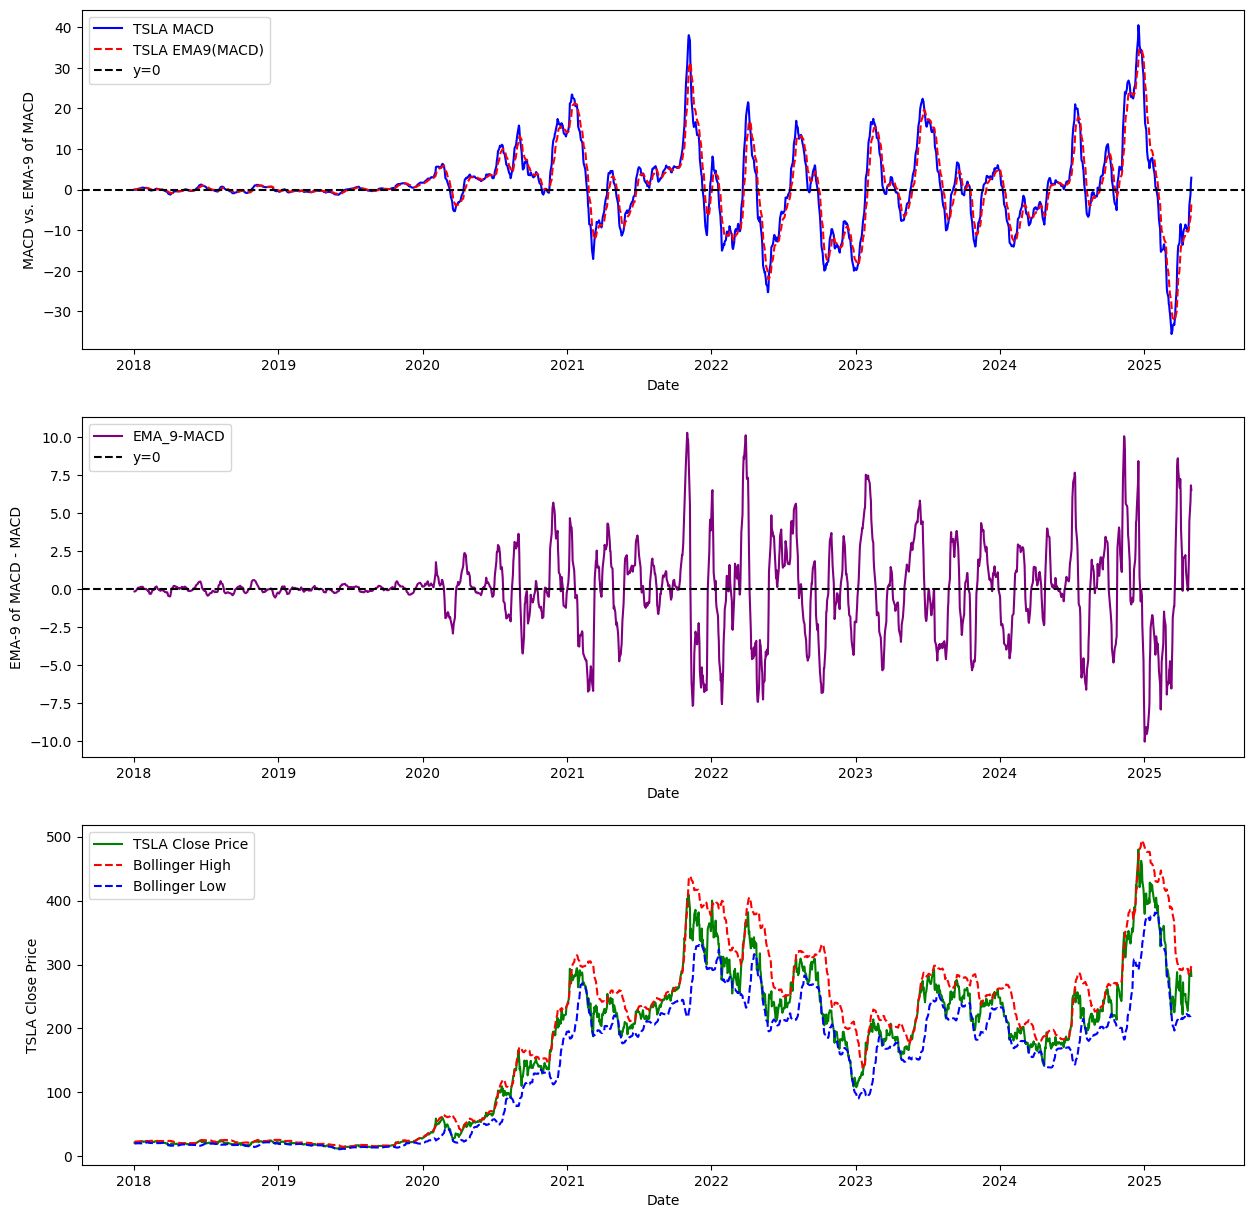

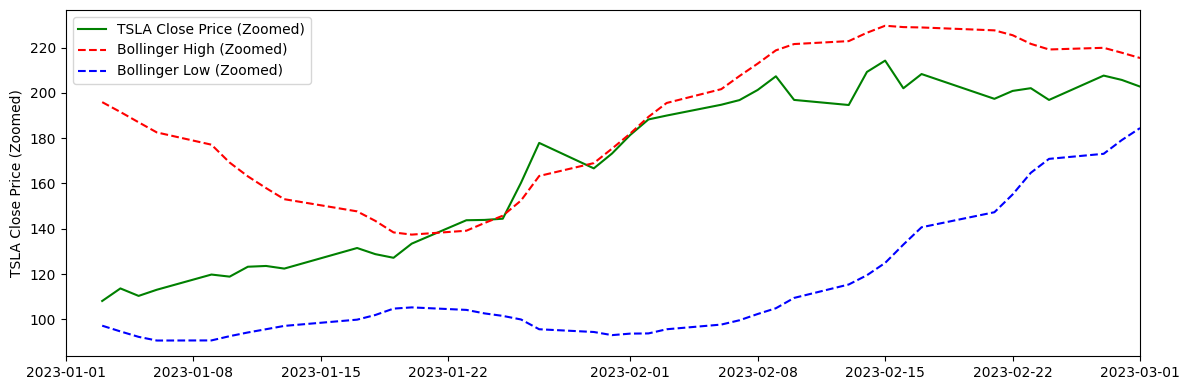

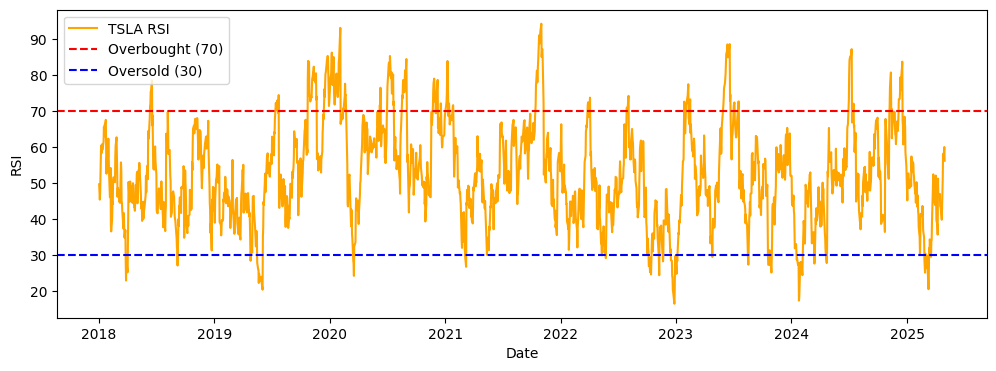

In [4]:
stock_analysis_plot(stock_data, 
                    stock_sticker=stock_sticker, 
                    zoom_start_date='2023-01-01', 
                    zoom_end_date='2023-03-01')